In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets, preprocessing, linear_model
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('dataset1.csv')
print(df.shape)

(150, 2)


In [ ]:
df.head()

,x1,y
0,0.000000,0.251493
1,0.006711,0.190664
2,0.013423,0.199697
3,0.020134,0.255534
4,0.026846,0.230805


In [ ]:
X = df[['x1']].values
print(X.shape) # (n_samples, n_features)

y = df['y'].values
print(y.shape) # (n_samples,)

(150, 1)
(150,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (120, 1)
X_test shape: (30, 1)


(0.0, 1.0, 0.0, 1.0)

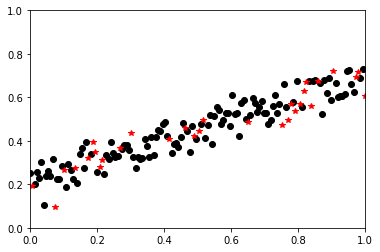

In [ ]:
plt.plot(X_train, y_train, "ko")
plt.plot(X_test, y_test, 'r*')
plt.axis([0, 1, 0, 1])

In [ ]:
model = linear_model.LinearRegression()
model = model.fit(X_train, y_train)
y_predicted = model.predict(X_test)

theta0 = model.intercept_
theta1 = model.coef_
print(theta0)
print(theta1)

0.21340233163380795
[0.48267886]


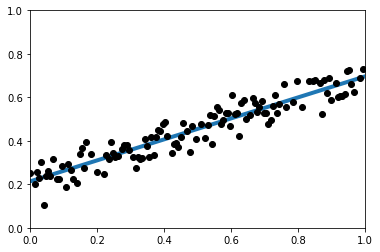

In [ ]:
xx = np.linspace(0, 1, 100)
yy = theta0 + theta1*xx
plt.plot(xx, yy, lw=4)
plt.plot(X_train, y_train, 'ko')
plt.axis([0, 1, 0, 1])
plt.show()

In [ ]:
mse_train = np.mean((y_train - model.predict(X_train))**2)
print("Training loss:", mse_train)
mse_test = np.mean((y_test - y_predicted)**2)
print("Testing loss:", mse_test)

Training loss: 0.0024786147642406795
Testing loss: 0.003112096227732804


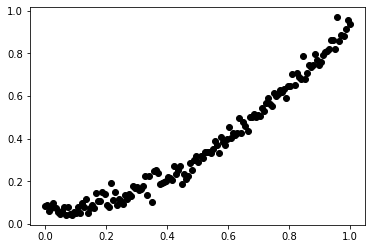

In [ ]:
df = pd.read_csv("dataset2.csv")
X = df[['x1']].values
y = df['y'].values

plt.plot(X, y, 'ko')

In [ ]:
df.head()

,x1,y
0,0.000000,0.081242
1,0.006711,0.087722
2,0.013423,0.057933
3,0.020134,0.073257
4,0.026846,0.097313


In [ ]:
df['x1^2'] = df['x1']**2
df.head()

,x1,y,x1^2
0,0.000000,0.081242,0.000000
1,0.006711,0.087722,0.000045
2,0.013423,0.057933,0.000180
3,0.020134,0.073257,0.000405
4,0.026846,0.097313,0.000721


In [ ]:
X = df[['x1', 'x1^2']].values
y = df['y'].values

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (150, 2)
Shape of y: (150,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 100)

In [ ]:
model = linear_model.LinearRegression()
model = model.fit(X_train, y_train)
y_predict = model.predict(X_test)

theta0 = model.intercept_
theta1 = model.coef_
print(theta0)
print(theta1)

0.053496397613713054
[0.09931488 0.79876521]


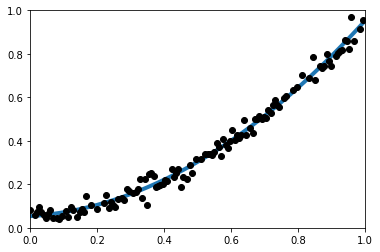

In [ ]:
xx = np.linspace(0, 1, 100)
yy = theta0 + theta1[0]*xx + theta1[1]*(xx**2)
plt.plot(xx, yy, lw=4)
plt.plot(X_train[:,0], y_train, 'ko')
plt.axis([0, 1, 0, 1])
plt.show()

In [ ]:
mse_train = np.mean((y_train - model.predict(X_train))**2)
print("Training loss:", mse_train)
mse_test = np.mean((y_test - y_predicted)**2)
print("Testing loss:", mse_test)

Training loss: 0.0007718495336839056
Testing loss: 0.023501316382341424


In [ ]:
data = datasets.load_boston()
data.keys()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [ ]:
X = data['data']
y = data['target']

print(X.shape)
print(y.shape)

(506, 13)
(506,)


In [ ]:
print(data['feature_names'])

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [ ]:
print(data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
df = pd.DataFrame(data['data'], columns=data['feature_names'])
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
print("Feature wise maxima")
print(df.max())
print("Feature wise minima")
print(df.min())

Feature wise maxima
CRIM        88.9762
ZN         100.0000
INDUS       27.7400
CHAS         1.0000
NOX          0.8710
RM           8.7800
AGE        100.0000
DIS         12.1265
RAD         24.0000
TAX        711.0000
PTRATIO     22.0000
B          396.9000
LSTAT       37.9700
dtype: float64
Feature wise minima
CRIM         0.00632
ZN           0.00000
INDUS        0.46000
CHAS         0.00000
NOX          0.38500
RM           3.56100
AGE          2.90000
DIS          1.12960
RAD          1.00000
TAX        187.00000
PTRATIO     12.60000
B            0.32000
LSTAT        1.73000
dtype: float64


In [ ]:
X_norm = preprocessing.minmax_scale(X)
df = pd.DataFrame(X_norm, columns = data['feature_names'])
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338


In [ ]:
print("Feature wise maxima")
print(df.max())
print("Feature wise minima")
print(df.min())

Feature wise maxima
CRIM       1.0
ZN         1.0
INDUS      1.0
CHAS       1.0
NOX        1.0
RM         1.0
AGE        1.0
DIS        1.0
RAD        1.0
TAX        1.0
PTRATIO    1.0
B          1.0
LSTAT      1.0
dtype: float64
Feature wise minima
CRIM       0.0
ZN         0.0
INDUS      0.0
CHAS       0.0
NOX        0.0
RM         0.0
AGE        0.0
DIS        0.0
RAD        0.0
TAX        0.0
PTRATIO    0.0
B          0.0
LSTAT      0.0
dtype: float64
